In [1]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, merge, Input, concatenate, add
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD, RMSprop
from keras.utils.data_utils import get_file
import random
from keras.applications import VGG16, ResNet50, VGG19
import os
import itertools
import cv2
from sklearn.metrics import log_loss, confusion_matrix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:

from keras.preprocessing.image import ImageDataGenerator
image_width = 150
image_height = 150

img_rows =  224
img_cols =  224
image_size = (image_width, image_height)

data_datagen = ImageDataGenerator(rescale=1.0/255,  validation_split=0.15)

train_generator = data_datagen.flow_from_directory(
        '../input/simpsons_dataset/simpsons_dataset',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='training')

validation_generator = data_datagen.flow_from_directory(
        '../input/simpsons_dataset/simpsons_dataset',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='validation')



Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [3]:

def create_model(p):
    model = Sequential()
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu', input_shape=(150,150,3)))
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(units= 64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [4]:
small_model = create_model(0)

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

In [7]:
def compile_model(lr, epochs):
    small_model.compile(optimizer=RMSprop(lr=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

    N_TRAIN = 11745
    N_VAL = 2066 
    history = small_model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // 132),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=(N_VAL // 132))
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best');
    
    

# 2 b- Lr = 0.001, Epoch = 10

In [ ]:
compile_model(0.001, 10)

# 2 b- Lr = 0.001, Epoch = 50

In [ ]:
compile_model(0.001, 50)

# 2 b- Lr = 0.001, Epoch = 100

In [ ]:
compile_model(0.001, 100)

# 2 b- Lr = 0.01, Epoch = 10

In [ ]:
compile_model(0.01, 10)

# 2 b- Lr = 0.01, Epoch = 50

Epoch 1/50
88/88 [==============================] - 21s 241ms/step - loss: 14.2979 - acc: 0.1129 - val_loss: 14.6406 - val_acc: 0.0917
Epoch 2/50
88/88 [==============================] - 19s 219ms/step - loss: 14.4811 - acc: 0.1016 - val_loss: 14.2377 - val_acc: 0.1167
Epoch 3/50
88/88 [==============================] - 19s 220ms/step - loss: 14.4811 - acc: 0.1016 - val_loss: 14.7078 - val_acc: 0.0875
Epoch 4/50
88/88 [==============================] - 20s 222ms/step - loss: 14.5725 - acc: 0.0959 - val_loss: 14.1925 - val_acc: 0.1195
Epoch 5/50
88/88 [==============================] - 19s 218ms/step - loss: 14.5612 - acc: 0.0966 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 6/50
88/88 [==============================] - 19s 218ms/step - loss: 14.4925 - acc: 0.1009 - val_loss: 14.7078 - val_acc: 0.0875
Epoch 7/50
88/88 [==============================] - 19s 218ms/step - loss: 14.3323 - acc: 0.1108 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 8/50
88/88 [==============================] - 19s

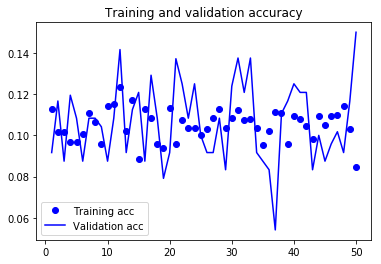

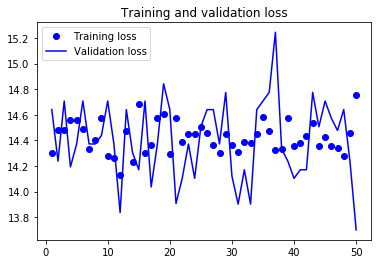

In [8]:
compile_model(0.01, 50)

# 2 b- Lr = 0.01, Epoch = 100

Epoch 1/100
88/88 [==============================] - 21s 242ms/step - loss: 14.4353 - acc: 0.1044 - val_loss: 14.5734 - val_acc: 0.0958
Epoch 2/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3208 - acc: 0.1115 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 3/100
88/88 [==============================] - 19s 217ms/step - loss: 14.4582 - acc: 0.1030 - val_loss: 14.2377 - val_acc: 0.1167
Epoch 4/100
88/88 [==============================] - 19s 216ms/step - loss: 14.3455 - acc: 0.1100 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 5/100
88/88 [==============================] - 19s 217ms/step - loss: 14.2865 - acc: 0.1136 - val_loss: 14.6917 - val_acc: 0.0885
Epoch 6/100
88/88 [==============================] - 19s 218ms/step - loss: 14.5498 - acc: 0.0973 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 7/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3666 - acc: 0.1087 - val_loss: 14.0362 - val_acc: 0.1292
Epoch 8/100
88/88 [=============================

Epoch 61/100
88/88 [==============================] - 19s 216ms/step - loss: 14.4124 - acc: 0.1058 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
88/88 [==============================] - 19s 216ms/step - loss: 14.0802 - acc: 0.1264 - val_loss: 14.5734 - val_acc: 0.0958
Epoch 63/100
88/88 [==============================] - 19s 218ms/step - loss: 14.4124 - acc: 0.1058 - val_loss: 14.1705 - val_acc: 0.1208
Epoch 64/100
88/88 [==============================] - 19s 218ms/step - loss: 14.4239 - acc: 0.1051 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 65/100
88/88 [==============================] - 19s 218ms/step - loss: 14.5269 - acc: 0.0987 - val_loss: 14.1705 - val_acc: 0.1208
Epoch 66/100
88/88 [==============================] - 19s 218ms/step - loss: 14.5154 - acc: 0.0994 - val_loss: 14.7630 - val_acc: 0.0841
Epoch 67/100
88/88 [==============================] - 19s 217ms/step - loss: 14.4811 - acc: 0.1016 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 68/100
88/88 [=====================

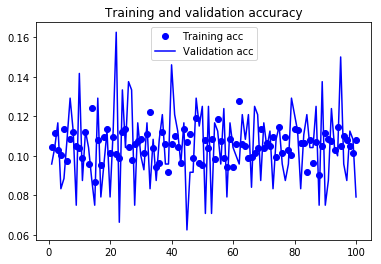

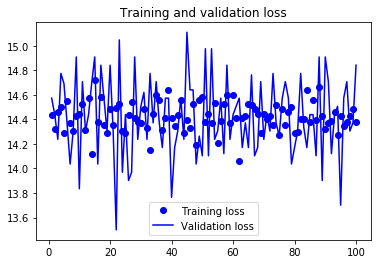

In [9]:
compile_model(0.01, 100)

# 2 b- Lr = 0.1, Epoch = 10

Epoch 1/10
88/88 [==============================] - 21s 239ms/step - loss: 14.5383 - acc: 0.0980 - val_loss: 14.2377 - val_acc: 0.1167
Epoch 2/10
88/88 [==============================] - 19s 218ms/step - loss: 14.3208 - acc: 0.1115 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
88/88 [==============================] - 19s 218ms/step - loss: 14.5841 - acc: 0.0952 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 4/10
88/88 [==============================] - 19s 217ms/step - loss: 14.3092 - acc: 0.1122 - val_loss: 14.9092 - val_acc: 0.0750
Epoch 5/10
88/88 [==============================] - 19s 218ms/step - loss: 14.6872 - acc: 0.0888 - val_loss: 14.1705 - val_acc: 0.1208
Epoch 6/10
88/88 [==============================] - 19s 218ms/step - loss: 14.4697 - acc: 0.1023 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 7/10
88/88 [==============================] - 19s 218ms/step - loss: 14.2979 - acc: 0.1129 - val_loss: 13.9690 - val_acc: 0.1333
Epoch 8/10
88/88 [==============================] - 19s

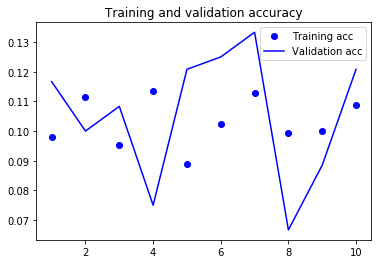

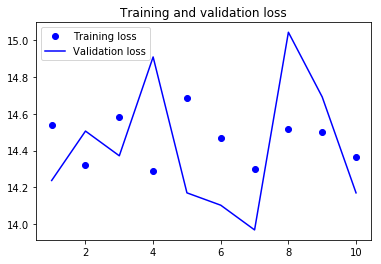

In [10]:
compile_model(0.01, 10)

# 2 b- Lr = 0.1, Epoch = 50

Epoch 1/50
88/88 [==============================] - 21s 242ms/step - loss: 14.1949 - acc: 0.1193 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 2/50
88/88 [==============================] - 19s 217ms/step - loss: 14.3893 - acc: 0.1073 - val_loss: 14.6406 - val_acc: 0.0917
Epoch 3/50
88/88 [==============================] - 19s 219ms/step - loss: 14.4010 - acc: 0.1065 - val_loss: 14.6406 - val_acc: 0.0917
Epoch 4/50
88/88 [==============================] - 19s 219ms/step - loss: 14.2979 - acc: 0.1129 - val_loss: 14.2377 - val_acc: 0.1167
Epoch 5/50
88/88 [==============================] - 19s 218ms/step - loss: 14.2522 - acc: 0.1158 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
88/88 [==============================] - 19s 219ms/step - loss: 14.5612 - acc: 0.0966 - val_loss: 14.6406 - val_acc: 0.0917
Epoch 7/50
88/88 [==============================] - 19s 218ms/step - loss: 14.3781 - acc: 0.1080 - val_loss: 14.1925 - val_acc: 0.1195
Epoch 8/50
88/88 [==============================] - 19s

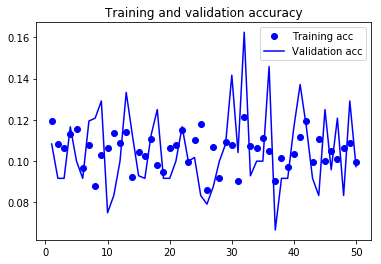

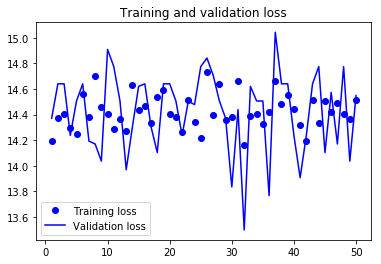

In [11]:
compile_model(0.1, 50)

# 2 b- Lr = 0.1, Epoch = 100

Epoch 1/100
88/88 [==============================] - 21s 241ms/step - loss: 14.1949 - acc: 0.1193 - val_loss: 14.3048 - val_acc: 0.1125
Epoch 2/100
88/88 [==============================] - 19s 217ms/step - loss: 14.4008 - acc: 0.1065 - val_loss: 14.1705 - val_acc: 0.1208
Epoch 3/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3552 - acc: 0.1094 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 4/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3437 - acc: 0.1101 - val_loss: 15.1107 - val_acc: 0.0625
Epoch 5/100
88/88 [==============================] - 19s 218ms/step - loss: 14.6070 - acc: 0.0938 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 6/100
88/88 [==============================] - 19s 218ms/step - loss: 14.5269 - acc: 0.0987 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 7/100
88/88 [==============================] - 19s 218ms/step - loss: 14.4468 - acc: 0.1037 - val_loss: 14.3720 - val_acc: 0.1083
Epoch 8/100
88/88 [=============================

Epoch 61/100
88/88 [==============================] - 19s 219ms/step - loss: 14.3552 - acc: 0.1094 - val_loss: 13.9019 - val_acc: 0.1375
Epoch 62/100
88/88 [==============================] - 19s 218ms/step - loss: 14.4925 - acc: 0.1009 - val_loss: 14.7078 - val_acc: 0.0875
Epoch 63/100
88/88 [==============================] - 19s 216ms/step - loss: 14.3552 - acc: 0.1094 - val_loss: 14.8421 - val_acc: 0.0792
Epoch 64/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3552 - acc: 0.1094 - val_loss: 14.2377 - val_acc: 0.1167
Epoch 65/100
88/88 [==============================] - 19s 218ms/step - loss: 14.4010 - acc: 0.1065 - val_loss: 14.7078 - val_acc: 0.0875
Epoch 66/100
88/88 [==============================] - 19s 218ms/step - loss: 14.5383 - acc: 0.0980 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 67/100
88/88 [==============================] - 19s 218ms/step - loss: 14.3666 - acc: 0.1087 - val_loss: 14.7749 - val_acc: 0.0833
Epoch 68/100
88/88 [=====================

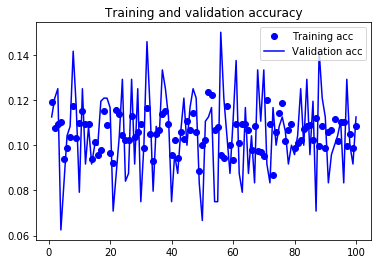

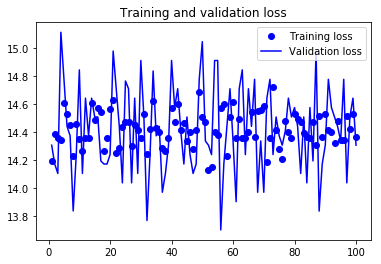

In [12]:
compile_model(0.1, 100)